In [1]:
import cv2
import torch
import os

In [ ]:
# Install dependencies (if not already installed)
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt  # Install required dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17270/17270), 16.12 MiB | 25.19 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:0

In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal


image 1/1 /content/sample_image.jpg: 640x640 1 color_palette, 77.5ms
Speed: 8.5ms preprocess, 77.5ms inference, 233.8ms postprocess per image at shape (1, 3, 640, 640)


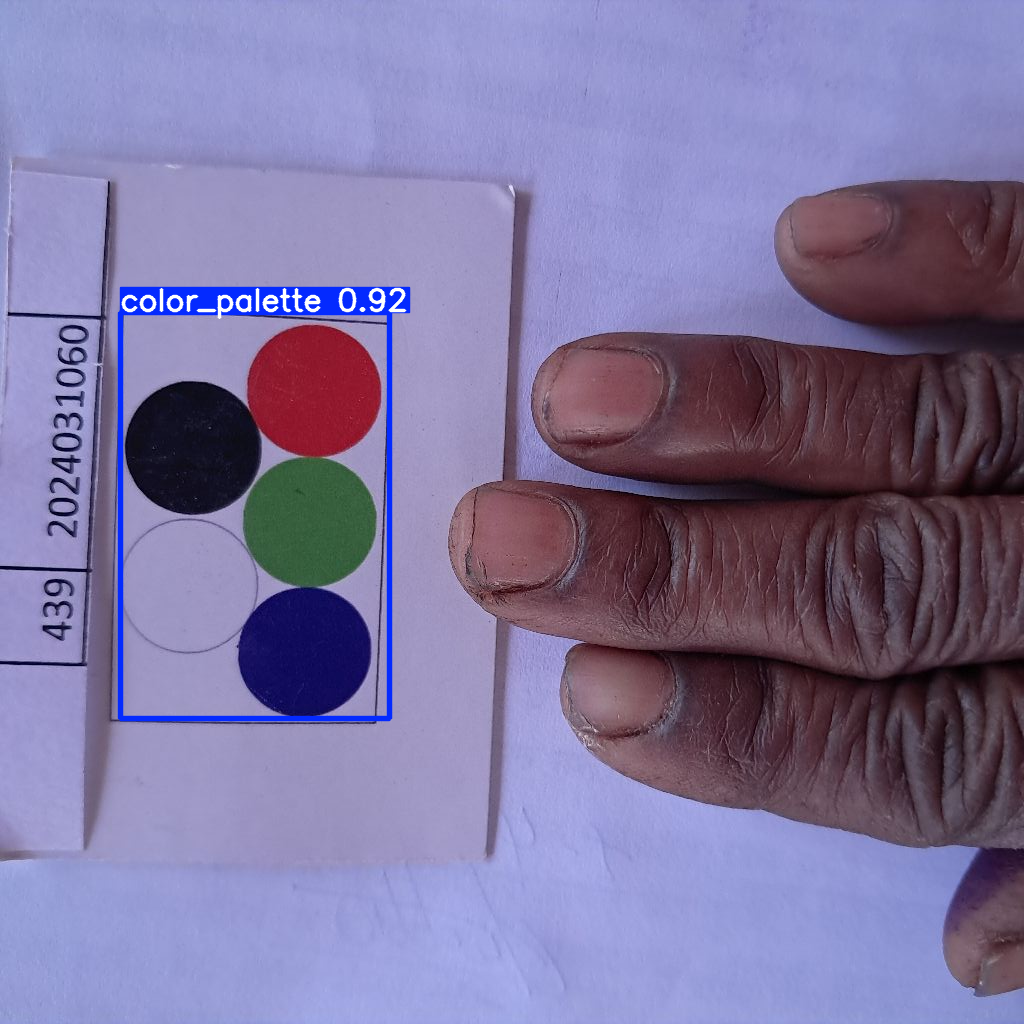

In [4]:
from ultralytics import YOLO

# Load the custom model (replace 'my_model.pt' with your model file)
model = YOLO('/content/my_model.pt')

# Perform inference on an image
results = model('/content/sample_image.jpg')  # Replace with your image path

# Show results
for result in results:
    result.show()  # Correct way to show results



image 1/1 /content/sample_image.jpg: 640x640 1 color_palette, 101.0ms
Speed: 4.0ms preprocess, 101.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


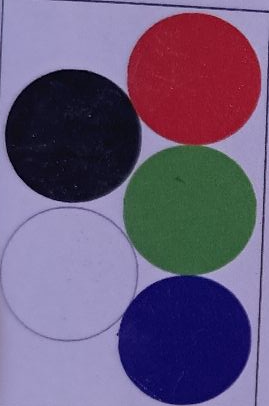

In [9]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the detection model
model = YOLO('/content/my_model.pt')

# Perform inference
results = model('/content/sample_image.jpg', imgsz=640)

# Load the original image
image = cv2.imread('/content/sample_image.jpg')

# Process results using bounding boxes only
for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)  # Convert to int

        # Crop the region using bounding box
        cropped_img = image[y1:y2, x1:x2]

        # Save the cropped image
        cv2.imwrite('/content/cropped_image.jpg', cropped_img)

        # Display the cropped image in Colab
        cv2_imshow(cropped_img)
